# Operations

scmdata has limited support for operations with `ScmRun` instances. Here we provide examples of how to use them.

## Available operations

At present, only add/subtract are available. We hope to add more in future but we need Pint support in Pandas first, which requires [this issue](https://github.com/hgrecco/pint-pandas/issues/33) to be solved. 

## Load some data

We first load some test data.

In [1]:
import traceback

from scmdata import ScmRun, run_append

import matplotlib.pyplot as plt

In [2]:
db_emms = ScmRun("rcp26_emissions.csv", lowercase_cols=True)
db_emms.tail()

time                                                                1765-01-01 00:00:00  \
model scenario region variable        unit          parameter_type                        
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr average                         0.0   
                      Emissions|NOx   Mt N / yr     average                         0.0   
                      Emissions|OC    Mt OC / yr    average                         0.0   
                      Emissions|SF6   kt SF6 / yr   average                         0.0   
                      Emissions|SOx   Mt S / yr     average                         0.0   

time                                                                1766-01-01 00:00:00  \
model scenario region variable        unit          parameter_type                        
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr average                    1.596875   
                      Emissions|NOx   Mt N / yr     average                    0.109502   
                      Emissions|OC    Mt OC / yr    average                    0.565920   
                      Emissions|SF6   kt SF6 / yr   average                    0.000000   
                      Emissions|SOx   Mt S / yr     average                    0.098883   

time                                                                1767-01-01 00:00:00  \
model scenario region variable        unit          parameter_type                        
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr average                    2.292316   
                      Emissions|NOx   Mt N / yr     average                    0.168038   
                      Emissions|OC    Mt OC / yr    average                    0.781468   
                      Emissions|SF6   kt SF6 / yr   average                    0.000000   
                      Emissions|SOx   Mt S / yr     average                    0.116307   

time                                                                1768-01-01 00:00:00  \
model scenario region variable        unit          parameter_type                        
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr average                    2.988648   
                      Emissions|NOx   Mt N / yr     average                    0.226625   
                      Emissions|OC    Mt OC / yr    average                    0.997361   
                      Emissions|SF6   kt SF6 / yr   average                    0.000000   
                      Emissions|SOx   Mt S / yr     average                    0.133811   

time                                                                1769-01-01 00:00:00  \
model scenario region variable        unit          parameter_type                        
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr average                    3.685897   
                      Emissions|NOx   Mt N / yr     average                    0.285264   
                      Emissions|OC    Mt OC / yr    average                    1.213611   
                      Emissions|SF6   kt SF6 / yr   average                    0.000000   
                      Emissions|SOx   Mt S / yr     average                    0.151398   

time                                                                1770-01-01 00:00:00  \
model scenario region variable        unit          parameter_type                        
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr average                    4.384091   
                      Emissions|NOx   Mt N / yr     average                    0.343956   
                      Emissions|OC    Mt OC / yr    average                    1.430229   
                      Emissions|SF6   kt SF6 / yr   average                    0.000000   
                      Emissions|SOx   Mt S / yr     average                    0.169070   

time                                                                1771-01-01 00:00:00  \
model scenario region variable        unit          parameter_type               

In [3]:
db_forcing = ScmRun("rcmip-radiative-forcing-annual-means-v4-0-0.csv", lowercase_cols=True)
db_forcing.drop_meta(["mip_era", "activity_id"])
db_forcing.head()

time                                                                            1750-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1751-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1752-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1753-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1754-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1755-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2   

### Add

A very simple example is adding two variables together. For example, below we calculate total CO$_2$ emissions for the RCP2.6 scenario. 

In [4]:
emms_co2 = db_emms.filter(variable="Emissions|CO2|MAGICC Fossil and Industrial").add(
    db_emms.filter(variable="Emissions|CO2|MAGICC AFOLU"),
    op_cols={
        "variable": "Emissions|CO2"
    }
)
emms_co2.head()

,,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,parameter_type,,,,,,,,,,,,,,,,,,,,,
IMAGE,RCP26,World,Emissions|CO2,Gt C / yr,average,0.003,0.008338,0.013677,0.019015,0.024353,0.029691,0.03603,0.041368,0.046706,0.052045,...,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308


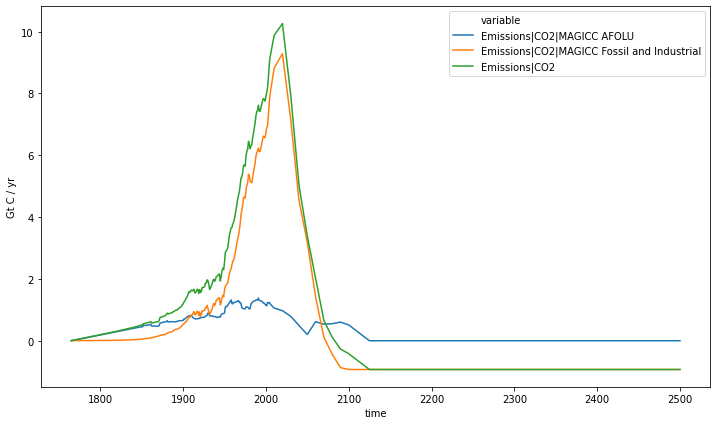

In [5]:
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
plt_df = run_append([db_emms, emms_co2])
plt_df.filter(variable="*CO2*").lineplot(hue="variable", ax=ax)

The `op_cols` argument tells scmdata which columns to ignore when aligning the data and what value to give this column in the output. So we could do the same calculation but give the output a different name as shown below.

In [6]:
emms_co2_different_name = db_emms.filter(variable="Emissions|CO2|MAGICC Fossil and Industrial").add(
    db_emms.filter(variable="Emissions|CO2|MAGICC AFOLU"),
    op_cols={
        "variable": "Emissions|CO2|Total"
    }
)
emms_co2_different_name.head()

,,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,parameter_type,,,,,,,,,,,,,,,,,,,,,
IMAGE,RCP26,World,Emissions|CO2|Total,Gt C / yr,average,0.003,0.008338,0.013677,0.019015,0.024353,0.029691,0.03603,0.041368,0.046706,0.052045,...,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308


## Subtract

Subtraction works much the same way. Below we calculate the total effective radiative forcing and CO$_2$ effective radiative forcing in the [RCMIP](rcmip.org) data.

In [7]:
non_co2_rf = db_forcing.filter(variable="Effective Radiative Forcing").subtract(
    db_forcing.filter(variable="Effective Radiative Forcing|Anthropogenic|CO2"),
    op_cols={
        "variable": "Effective Radiative Forcing|Non-CO2"
    }
)
non_co2_rf.head()

time                                                                                1750-01-01 00:00:00  \
model   scenario                  region variable                            unit                         
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.259367   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 W/m^2             0.259367   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 W/m^2             0.259367   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.259367   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.259367   

time                                                                                1751-01-01 00:00:00  \
model   scenario                  region variable                            unit                         
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.241965   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 W/m^2             0.241965   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 W/m^2             0.241965   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.241965   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.241965   

time                                                                                1752-01-01 00:00:00  \
model   scenario                  region variable                            unit                         
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.213009   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 W/m^2             0.213009   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 W/m^2             0.213009   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.213009   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.213009   

time                                                                                1753-01-01 00:00:00  \
model   scenario                  region variable                            unit                         
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.177158   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 W/m^2             0.177158   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 W/m^2             0.177158   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.177158   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.177158   

time                                                                                1754-01-01 00:00:00  \
model   scenario                  region variable                            unit                         
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.142201   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 W/m^2             0.142201   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 W/m^2             0.142201   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.142201   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 W/m^2             0.142201   

time                                                                                1755-01-01 00:00:00  \
model   scenario                  region variable                            unit                         
AIM/CGE ssp370                    Wo

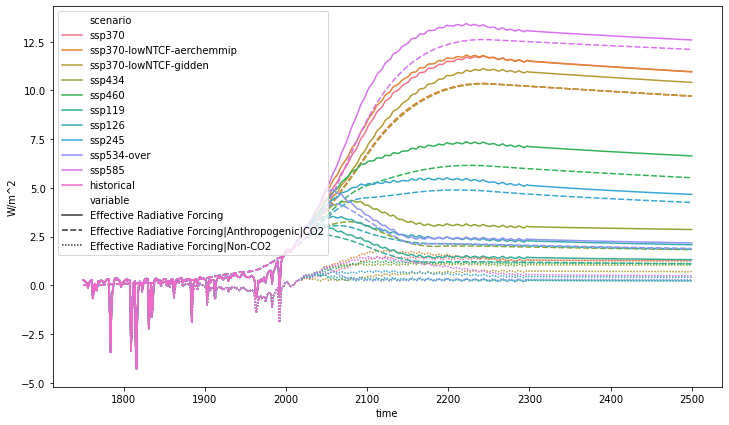

In [8]:
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
plt_df_forcing = run_append([db_forcing, non_co2_rf])
plt_df_forcing.filter(variable=["Effective Radiative Forcing", "Effective*CO2*"]).lineplot(style="variable")

We could also calculate the difference between some SSP and RCP scenarios. The first thing to try would be to simply subtract the SSP126 total effective radiative forcing from the RCP26 total radiative forcing.

In [9]:
try:
    ssp126_minus_rcp26 = db_forcing.filter(scenario="ssp126", variable="Effective Radiative Forcing").subtract(
        db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
        op_cols = {
            "scenario": "ssp126 - rcp26",
        }
    )
except KeyError:
    traceback.print_exc(limit=0, chain=False)

Traceback (most recent call last):
KeyError: "No equivalent in `other` for [('model', 'IMAGE'), ('region', 'World'), ('variable', 'Effective Radiative Forcing'), ('unit', 'W/m^2')]"


Doing this gives us a `KeyError`. The reason is that the SSP126 variable is `Effective Radiative Forcing` whilst the RCP26 variable is `Radiative Forcing` hence the two datasets don't align. We can work around this using the `op_cols` argument.

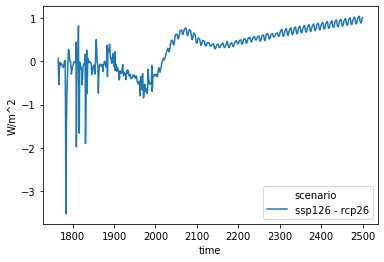

In [10]:
ssp126_minus_rcp26 = db_forcing.filter(scenario="ssp126", variable="Effective Radiative Forcing").subtract(
        db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
        op_cols = {
            "scenario": "ssp126 - rcp26",
            "variable": "RF",
        }
    )
ssp126_minus_rcp26.lineplot()

We could create plots of all the differences as shown below.

In [11]:
ssp_rcp_diffs = []
for target in ["26", "45", "60", "85"]:
    ssp = db_forcing.filter(scenario="ssp*{}".format(target), variable="Effective Radiative Forcing")
    ssp_scen = ssp.get_unique_meta("scenario", no_duplicates=True)
    ssp_model = ssp.get_unique_meta("model", no_duplicates=True)
    
    rcp = db_forcing.filter(scenario="rcp{}".format(target), variable="Radiative Forcing")
    rcp_scen = rcp.get_unique_meta("scenario", no_duplicates=True)
    rcp_model = rcp.get_unique_meta("model", no_duplicates=True)
    
    ssp_rcp_diff = ssp.subtract(
        rcp,
        op_cols = {
            "scenario": "{} - {}".format(ssp_scen, rcp_scen),
            "model": "{} - {}".format(ssp_model, rcp_model),
            "variable": "RF",
        }
    )
    ssp_rcp_diffs.append(ssp_rcp_diff)
    
ssp_rcp_diffs = run_append(ssp_rcp_diffs)
ssp_rcp_diffs.head()

,,,,time,1750-01-01 00:00:00,1751-01-01 00:00:00,1752-01-01 00:00:00,1753-01-01 00:00:00,1754-01-01 00:00:00,1755-01-01 00:00:00,1756-01-01 00:00:00,1757-01-01 00:00:00,1758-01-01 00:00:00,1759-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,,,,,
IMAGE - IMAGE,ssp126 - rcp26,World,RF,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.036063,1.044192,0.998926,0.927014,0.894074,0.886604,0.904720,0.950169,0.995562,1.012583
MESSAGE-GLOBIOM - MiniCAM,ssp245 - rcp45,World,RF,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.460000,0.458162,0.456325,0.454487,0.452659,0.450835,0.449006,0.447191,0.445375,0.444465
GCAM4 - AIM,ssp460 - rcp60,World,RF,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.656893,0.654786,0.652687,0.650594,0.648503,0.646411,0.644319,0.642235,0.640155,0.639114
REMIND-MAGPIE - MESSAGE,ssp585 - rcp85,World,RF,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.266282,0.264204,0.262160,0.260144,0.258118,0.256072,0.254027,0.252006,0.250012,0.248969


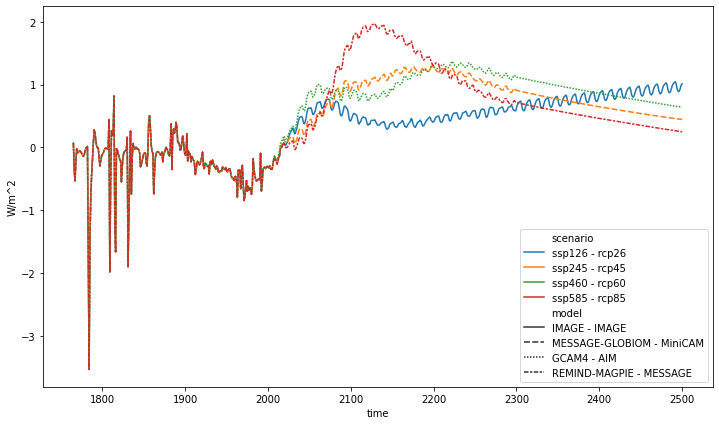

In [12]:
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
ssp_rcp_diffs.lineplot(ax=ax, style="model")